# XGBoost

XGBoost is one of the implementations of gradient boosted trees. 

In [1]:
!pip install xgboost
!pip install ipynb

In [2]:
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt

from ipynb.fs.full.Functions import load_train_test_data, model_eval, run_gridsearchCV, run_randomizedsearchCV, load_model

In [3]:
X_train, X_test, y_train, y_test = load_train_test_data()

A snippet of our training data:


,Age,PhysicallyActive,BMI,Sleep,SoundSleep,JunkFood,Stress,BPLevel,Pregnancies,UrinationFreq,BMI_high,Family_Diabetes_yes,Pdiabetes_yes,Gender_Male,Alcohol_yes,Smoking_yes,RegularMedicine_yes,highBP_yes
16,2.0,2.0,-0.697273,0.022886,0.256854,0.0,1.0,1.0,-0.413322,0.0,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
110,2.0,1.0,0.428174,0.022886,-0.812113,0.0,2.0,2.0,-0.413322,1.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0
28,1.0,0.0,0.615748,-0.786704,0.256854,0.0,0.0,1.0,-0.413322,0.0,1,1.0,0.0,1.0,0.0,0.0,0.0,0.0
74,2.0,0.0,0.990897,0.022886,0.256854,0.0,3.0,2.0,-0.413322,0.0,1,1.0,0.0,1.0,1.0,0.0,1.0,1.0
147,0.0,1.0,0.428174,0.832476,1.325822,0.0,1.0,1.0,-0.413322,1.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0


There are 240 entries with 18 columns in our training data.
There are 43 entries with 18 columns in our testing data.


In [4]:
xgb_classifier = xgb.XGBClassifier(seed=0).fit(X_train,y_train)

In [5]:
print(xgb_classifier)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)


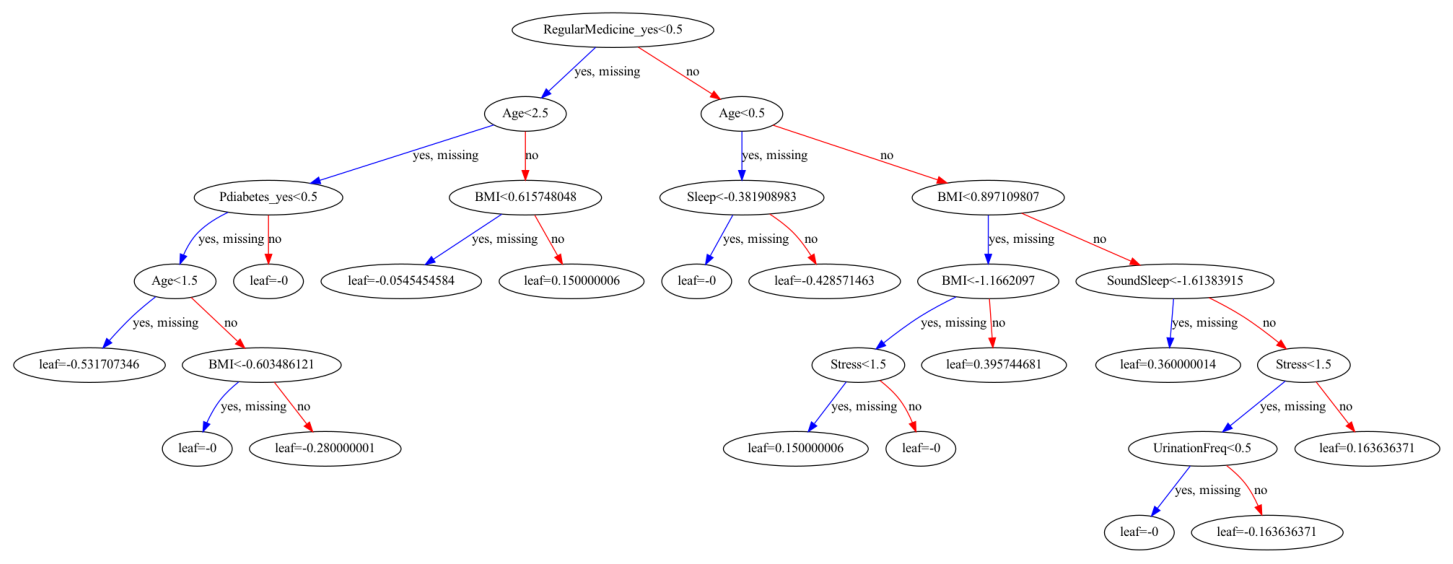

In [6]:
# Visualize
plot_tree(xgb_classifier)
plt.gcf().set_size_inches(18.5, 10.5)


Evaluation: accuracy_score
92.92% for the train data
72.09% for the test data

Evaluation: f1_score
88.59% for the train data
40.00% for the test data

Evaluation: recall_score
85.71% for the train data
28.57% for the test data

Evaluation: precision_score
91.67% for the train data
66.67% for the test data

Evaluation: confusion_matrix


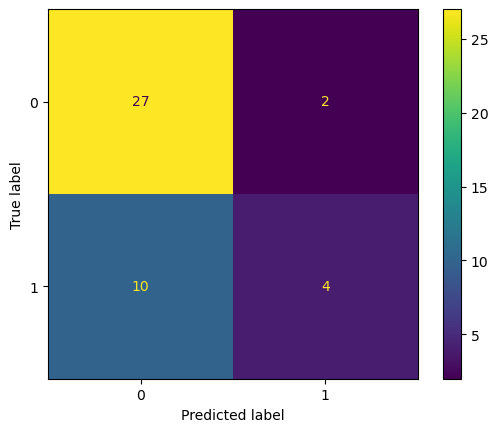


Evaluation: roc


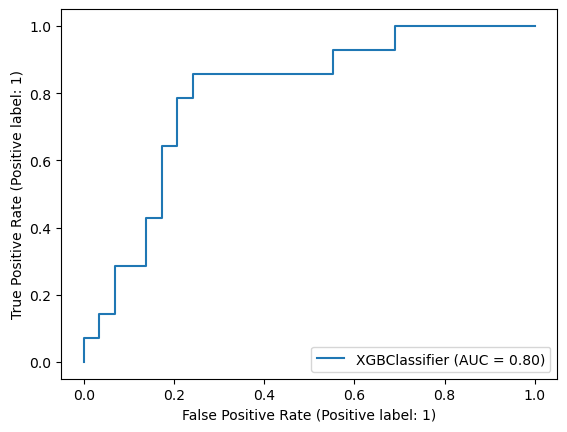

[(0.9291666666666667, 0.7209302325581395),
 (0.8859060402684563, 0.4),
 (0.8571428571428571, 0.2857142857142857),
 (0.9166666666666666, 0.6666666666666666)]

In [7]:
# evaluation
model_eval(xgb_classifier, X_train, X_test, y_train, y_test, confusion=True, roc=True)

In [8]:
grid_params = {
        'max_depth': [3, 4, 5, 6],
        'n_estimators': [60, 100, 140, 200],
        'learning_rate': [0.3, 0.1, 0.01, 0.05]
        }

run_gridsearchCV(xgb_classifier, grid_params, X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.0s
[CV] END ....learning_rate=0.3, max_depth=3, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.3, max_depth=3, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.3, max_depth=3, n_

[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.3s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.1s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=200; total time=   0.2s
[CV] END ...learning_rate=0.3, max_depth=5, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.

[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ....learning_rate=0.1, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=100; total time=   0.1s
[CV] END ...learning_rate=0.

[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=140; total time=   0.2s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.1, max_depth=6, n_estimators=200; total time=   0.3s
[CV] END ...learning_rate=0.

[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=140; total time=   0.2s
[CV] END ..learning_rate=0.0

[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=3, n_estimators=200; total time=   0.2s
[CV] END ...learning_rate=0.05, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.05, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.05, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.05, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.05, max_depth=4, n_estimators=60; total time=   0.1s
[CV] END ...learning_rate=0.

[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=100; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.2s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.3s
[CV] END ..learning_rate=0.05, max_depth=6, n_estimators=140; total time=   0.3s
[CV] END ..learning_rate=0.0


Evaluation: accuracy_score
85.42% for the train data
69.77% for the test data

Evaluation: f1_score
78.26% for the train data
38.10% for the test data

Evaluation: recall_score
81.82% for the train data
28.57% for the test data

Evaluation: precision_score
75.00% for the train data
57.14% for the test data

Evaluation: confusion_matrix


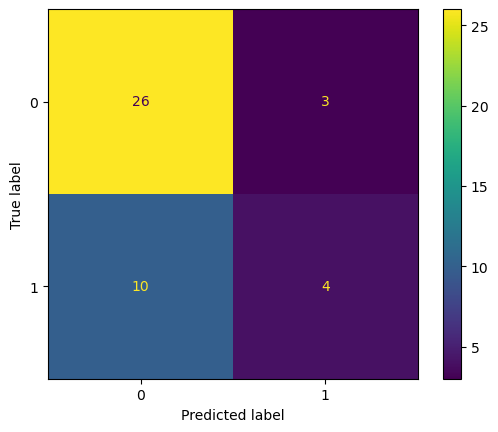


Evaluation: roc


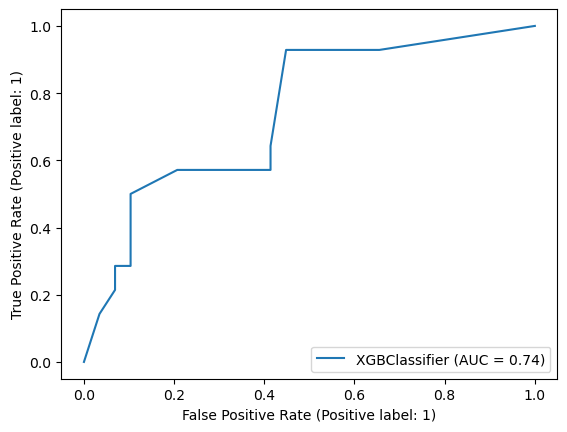

[(0.8541666666666666, 0.6976744186046512),
 (0.7826086956521738, 0.38095238095238093),
 (0.8181818181818182, 0.2857142857142857),
 (0.75, 0.5714285714285714)]

In [9]:
acc_best_model = load_model(xgb_classifier, 'accuracy')
model_eval(acc_best_model, X_train, X_test, y_train, y_test, confusion=True, roc=True)

In [15]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

random_params = {
    'max_depth': sp_randInt(3, 10),
    'n_estimators': sp_randInt(50, 100),
    'learning_rate': sp_randFloat()
}
run_randomizedsearchCV(xgb_classifier, random_params, X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] END learning_rate=0.488135224836994, max_depth=4, n_estimators=87; total time=   0.1s
[CV] END learning_rate=0.488135224836994, max_depth=4, n_estimators=87; total time=   0.1s
[CV] END learning_rate=0.488135224836994, max_depth=4, n_estimators=87; total time=   0.1s
[CV] END learning_rate=0.488135224836994, max_depth=4, n_estimators=87; total time=   0.1s
[CV] END learning_rate=0.488135224836994, max_depth=4, n_estimators=87; total time=   0.1s
[CV] END learning_rate=0.488135224836994, max_depth=4, n_estimators=87; total time=   0.1s
[CV] END learning_rate=0.488135224836994, max_depth=4, n_estimators=87; total time=   0.1s
[CV] END learning_rate=0.488135224836994, max_depth=4, n_estimators=87; total time=   0.1s
[CV] END learning_rate=0.488135224836994, max_depth=4, n_estimators=87; total time=   0.1s
[CV] END learning_rate=0.488135224836994, max_depth=4, n_estimators=87; total time=   0.1s
[CV] END learning_rate=0.65

[CV] END learning_rate=0.9177113340845444, max_depth=6, n_estimators=91; total time=   0.1s
[CV] END learning_rate=0.9177113340845444, max_depth=6, n_estimators=91; total time=   0.2s
[CV] END learning_rate=0.9177113340845444, max_depth=6, n_estimators=91; total time=   0.2s
[CV] END learning_rate=0.9177113340845444, max_depth=6, n_estimators=91; total time=   0.2s
[CV] END learning_rate=0.9177113340845444, max_depth=6, n_estimators=91; total time=   0.1s
[CV] END learning_rate=0.9177113340845444, max_depth=6, n_estimators=91; total time=   0.1s
[CV] END learning_rate=0.9177113340845444, max_depth=6, n_estimators=91; total time=   0.1s
[CV] END learning_rate=0.9177113340845444, max_depth=6, n_estimators=91; total time=   0.1s
[CV] END learning_rate=0.9177113340845444, max_depth=6, n_estimators=91; total time=   0.2s
[CV] END learning_rate=0.9177113340845444, max_depth=6, n_estimators=91; total time=   0.1s

Best hyperparameters : {'learning_rate': 0.7417299370615507, 'max_depth': 5, 'n


Evaluation: accuracy_score
92.92% for the train data
67.44% for the test data

Evaluation: f1_score
89.03% for the train data
36.36% for the test data

Evaluation: recall_score
89.61% for the train data
28.57% for the test data

Evaluation: precision_score
88.46% for the train data
50.00% for the test data

Evaluation: confusion_matrix


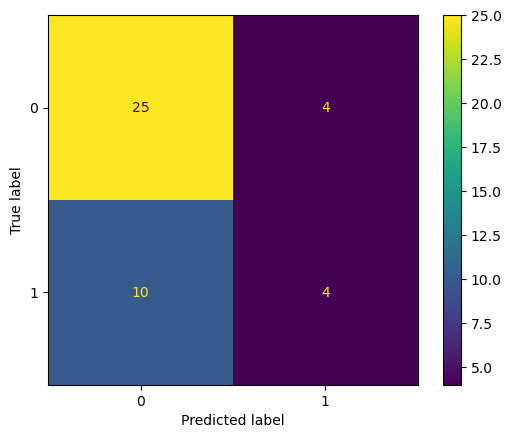


Evaluation: roc


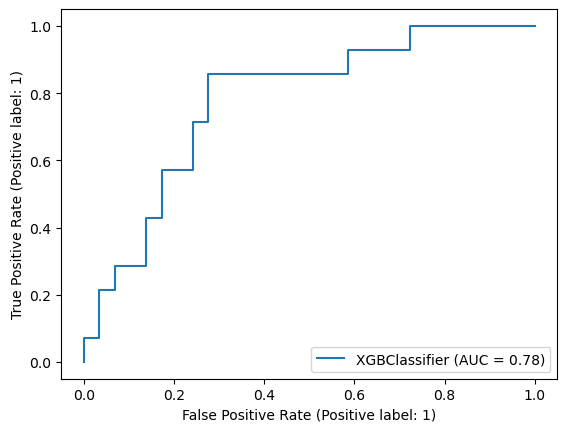

[(0.9291666666666667, 0.6744186046511628),
 (0.8903225806451613, 0.36363636363636365),
 (0.8961038961038961, 0.2857142857142857),
 (0.8846153846153846, 0.5)]

In [17]:
acc_best_model = load_model(xgb_classifier, 'accuracy', search='random')
model_eval(acc_best_model, X_train, X_test, y_train, y_test, confusion=True, roc=True)